<a href="https://colab.research.google.com/github/anicelysantos/tutoriais-dados-realpython/blob/main/numpy_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Estudos feitos a partir [desse tutorial](https://realpython.com/numpy-tutorial/) do site Real Python.*

Você é um professor que acaba de dar notas aos seus alunos em um teste recente. Infelizmente, você pode ter tornado o teste muito desafiador e a maioria dos alunos se saiu pior do que o esperado. Para ajudar a todos para fora, você vai curva de todos os graus .

No entanto, será uma curva relativamente rudimentar. Você pegará qualquer que seja a pontuação média e declarará que é C. Além disso, você se certificará de que a curva não prejudique acidentalmente as notas de seus alunos ou ajude tanto que o aluno se saia melhor do que 100%.

In [ ]:
import numpy as np
from numpy.random import default_rng
from math import e, factorial

In [ ]:
CENTRO_CURVA = 80

In [ ]:
#Cria uma matriz com as notas dos alunos
nota = np.array([72,35,64,88,51,90,74,12])

In [ ]:
def curva(nota):
  #pega a nota que passa por parametro e tira a media
  media = nota.mean()
  alterar = CENTRO_CURVA - media
  nova_nota = nota + alterar
  #passa a nota nova, depois a antiga e por ultimo um valor que não pode ser ultrapassado
  return np.clip(nova_nota, nota, 100)

In [ ]:
curva(nota)

array([ 91.25,  54.25,  83.25, 100.  ,  70.25, 100.  ,  93.25,  31.25])

# Dominando formas

In [ ]:
temperaturas = np.array([29.3, 42.1, 18.8, 16.1, 38.0, 12.5,
                         12.6, 49.9, 38.6, 31.3, 9.2, 22.2
                         ]).reshape(2,2,3)

In [ ]:
temperaturas.shape

(2, 2, 3)

In [ ]:
temperaturas

array([[[29.3, 42.1, 18.8],
        [16.1, 38. , 12.5]],

       [[12.6, 49.9, 38.6],
        [31.3,  9.2, 22.2]]])

In [ ]:
np.swapaxes(temperaturas, 1, 2)

array([[[29.3, 16.1],
        [42.1, 38. ],
        [18.8, 12.5]],

       [[12.6, 31.3],
        [49.9,  9.2],
        [38.6, 22.2]]])

# Eixos

In [ ]:
tabela = np.array([
                  [5,3,7,1],
                  [2,6,7,9],
                  [1,1,1,1],
                  [4,3,2,0],

])

In [ ]:
#retorna o maior valor da matriz
tabela.max()

9

In [ ]:
#retorna o maior valor em cada eixo vertical
tabela.max(axis=0)

array([5, 6, 7, 9])

In [ ]:
#retorna o maior valor em cada eixo horizontal
tabela.max(axis=1)

array([7, 9, 1, 4])

# Broadcast

In [ ]:
A = np.arange(32).reshape(4,1,8)
A

array([[[ 0,  1,  2,  3,  4,  5,  6,  7]],

       [[ 8,  9, 10, 11, 12, 13, 14, 15]],

       [[16, 17, 18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29, 30, 31]]])

In [ ]:
B = np.arange(48).reshape(1,6,8)
B

array([[[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47]]])

In [ ]:
A + B

array([[[ 0,  2,  4,  6,  8, 10, 12, 14],
        [ 8, 10, 12, 14, 16, 18, 20, 22],
        [16, 18, 20, 22, 24, 26, 28, 30],
        [24, 26, 28, 30, 32, 34, 36, 38],
        [32, 34, 36, 38, 40, 42, 44, 46],
        [40, 42, 44, 46, 48, 50, 52, 54]],

       [[ 8, 10, 12, 14, 16, 18, 20, 22],
        [16, 18, 20, 22, 24, 26, 28, 30],
        [24, 26, 28, 30, 32, 34, 36, 38],
        [32, 34, 36, 38, 40, 42, 44, 46],
        [40, 42, 44, 46, 48, 50, 52, 54],
        [48, 50, 52, 54, 56, 58, 60, 62]],

       [[16, 18, 20, 22, 24, 26, 28, 30],
        [24, 26, 28, 30, 32, 34, 36, 38],
        [32, 34, 36, 38, 40, 42, 44, 46],
        [40, 42, 44, 46, 48, 50, 52, 54],
        [48, 50, 52, 54, 56, 58, 60, 62],
        [56, 58, 60, 62, 64, 66, 68, 70]],

       [[24, 26, 28, 30, 32, 34, 36, 38],
        [32, 34, 36, 38, 40, 42, 44, 46],
        [40, 42, 44, 46, 48, 50, 52, 54],
        [48, 50, 52, 54, 56, 58, 60, 62],
        [56, 58, 60, 62, 64, 66, 68, 70],
        [64, 66, 68, 70, 72,

# Filtro, ordenação e agrupamento

**O quadrado mágico de Dürier**

O quadrado do número abaixo tem algumas propriedades incríveis. Se você somar qualquer uma das linhas, colunas ou diagonais, obterá o mesmo número, 34. Isso também é o que obterá se somar cada um dos quatro quadrantes, os quatro quadrados centrais, os quatro cantos quadrados, ou os quatro quadrados de canto de qualquer uma das grades 3 × 3 contidas. Você vai provar isso!

In [ ]:
quadrado = np.array([
                     [16, 3, 2, 13],
                     [5,10,11,8],
                     [9,6,7,12],
                     [4,15,14,1]
])

In [ ]:
for i in range(4):
  assert quadrado[:, i].sum() == 34
  assert quadrado[i, :].sum() == 34

A soma de cada quadrante

In [ ]:
assert quadrado[:2, :2].sum() == 34

In [ ]:
assert quadrado[2:, :2].sum() == 34

In [ ]:
assert quadrado[:2, 2:].sum() == 34

In [ ]:
assert quadrado[2:, 2:].sum() == 34

Versão simplificada pra somar os quadrantes

In [ ]:
quadrado.sum(axis=1)

**Filtros**

In [ ]:
numeros = np.linspace(5,50,24, dtype=int).reshape(4,-1)

In [ ]:
numeros

array([[ 5,  6,  8, 10, 12, 14],
       [16, 18, 20, 22, 24, 26],
       [28, 30, 32, 34, 36, 38],
       [40, 42, 44, 46, 48, 50]])

In [ ]:
#Analisa de cada elemento da matriz divide por 4
mascara = numeros % 4 == 0

In [ ]:
mascara

array([[False, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False],
       [ True, False,  True, False,  True, False]])

In [ ]:
numeros[mascara]

array([ 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])

In [ ]:
por_quatro = numeros[numeros % 4 == 0]

In [ ]:
por_quatro

array([ 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])

**Gerando valores aleatórios**

In [ ]:
rng = default_rng()

In [ ]:
valores = rng.standard_normal(10000)

In [ ]:
valores[:5]

array([-0.5294331 , -0.34707002, -0.27918764,  0.10261779, -0.79439257])

In [ ]:
std = valores.std()

In [ ]:
std

0.9965198315951587

In [ ]:
filtrado = valores[(valores > -2 * std) & (valores < 2 * std)]

In [ ]:
filtrado.size

9546

In [ ]:
valores.size

10000

In [ ]:
filtrado.size / valores.size

0.9546

**Transposição, classificação e concatenação**

In [ ]:
a = np.array([
              [1,2],
              [3,4],
              [5,6],
])

In [ ]:
a.T

array([[1, 3, 5],
       [2, 4, 6]])

In [ ]:
a.transpose()

array([[1, 3, 5],
       [2, 4, 6]])

**Classificação**

In [ ]:
data = np.array([
                 [7,1,4],
                 [8,6,5],
                 [1,2,3]
])

In [ ]:
np.sort(data)

array([[1, 4, 7],
       [5, 6, 8],
       [1, 2, 3]])

In [ ]:
np.sort(data, axis=None)

array([1, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
np.sort(data, axis=0)

array([[1, 1, 3],
       [7, 2, 4],
       [8, 6, 5]])

**Concatenação**

In [ ]:
a = np.array([
              [4,8],
              [6,1]
])

In [ ]:
b = np.array([
              [3,5],
              [7,2]
])

In [ ]:
np.hstack((a,b))

array([[4, 8, 3, 5],
       [6, 1, 7, 2]])

In [ ]:
np.vstack((b,a))

array([[3, 5],
       [7, 2],
       [4, 8],
       [6, 1]])

In [ ]:
np.concatenate((a,b))

array([[4, 8],
       [6, 1],
       [3, 5],
       [7, 2]])

In [ ]:
np.concatenate((a, b), axis = None)

array([4, 8, 6, 1, 3, 5, 7, 2])

# Exemplo prático 1: implementando uma série Maclaurin

Implementando uma função

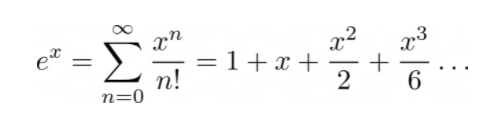

In [ ]:
fatorial = np.vectorize(factorial)


In [ ]:
def e_x(x, terms=10):

  n = np.arange(terms)
  return np.sum((x ** n) / fatorial(n))

if __name__ == "__main__":
  print("Atual:", e ** 3) #Uso da versão extendida da biblioteca importada lá em cima

  print("N (terms) \tMaclaurin\tError")

  for n in range(1,14):
    maclaurin = e_x(3, terms=n)
    print(f'{n}\t\t{maclaurin: .03f}\t\t{e**3 - maclaurin:.03f}')

Atual: 20.085536923187664
N (terms) 	Maclaurin	Error
1		 1.000		19.086
2		 4.000		16.086
3		 8.500		11.586
4		 13.000		7.086
5		 16.375		3.711
6		 18.400		1.686
7		 19.412		0.673
8		 19.846		0.239
9		 20.009		0.076
10		 20.063		0.022
11		 20.080		0.006
12		 20.084		0.001
13		 20.085		0.000


In [ ]:
#outra maneira de fazer a mesma coisa
n = np.arange(terms)
return np.sum((x ** n) / fac(n))

# Manipulando imagens com Matplotlib

In [ ]:
import matplotlib.image as mpimg

In [ ]:
img = mpimg.imread('/content/drive/MyDrive/dados_pandas/gatinho.jpg')
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(1299, 1920, 3)


Mudar a cor dos pixels da imagem

In [ ]:
#Gatinho azul
output = img.copy() #Lendo a versão original da imagem
output[:, :, :2] = 0
mpimg.imsave('blue.jpg', output)

In [ ]:
#Gatinho Cinza
output = img.copy()
averages = img.mean(axis=2) #pega a media de cada R, G e B
mpimg.imsave('bad-gray.jpeg', averages, cmap = 'gray')

In [ ]:
#Melhorando a luminosidade do Gatinho cinza
output = img.copy()
weights = np.array([0.3,0.59,0.11])
grayscale = img @ weights
mpimg.imsave('good-gray.jpg', grayscale, cmap='gray')